 ## **K-Means Clustering in Unsupervised Learning**
K-Means is one of the most popular clustering algorithms used in **unsupervised learning**. It is used to group data points into **K clusters** based on their similarity.

### **How K-Means Works**
The algorithm follows these steps:

1. **Select K**: Choose the number of clusters (K).
2. **Initialize Centroids**: Randomly place K cluster centroids in the feature space.
3. **Assign Points to Nearest Centroid**: Each data point is assigned to the nearest centroid based on a distance metric (usually **Euclidean distance**).
4. **Update Centroids**: Compute the new centroids as the **mean** of all points assigned to each cluster.
5. **Repeat Steps 3 & 4**: Iterate until centroids stop changing (i.e., convergence).

---

## **Mathematical Intuition Behind K-Means**
The goal of K-Means is to **minimize intra-cluster variance**, which is measured using the **sum of squared errors (SSE)**:

\[
J = \sum_{i=1}^{K} \sum_{x_j \in C_i} || x_j - \mu_i ||^2
\]

where:
- \( J \) is the objective function (which we minimize).
- \( K \) is the number of clusters.
- \( C_i \) represents the \( i \)-th cluster.
- \( x_j \) is a data point in cluster \( C_i \).
- \( \mu_i \) is the centroid of cluster \( C_i \).
- \( || x_j - \mu_i ||^2 \) is the squared Euclidean distance between a point and its centroid.

### **Key Steps Mathematically**
1. **Distance Calculation (Assignment Step)**  
   Each point \( x_j \) is assigned to the nearest centroid \( \mu_i \):

   \[
   C_i = \{ x_j : || x_j - \mu_i ||^2 \leq || x_j - \mu_k ||^2, \forall k \neq i \}
   \]

2. **Centroid Update (Update Step)**  
   The new centroid for each cluster is computed as the mean of all points in that cluster:

   \[
   \mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j
   \]

3. **Repeat Until Convergence**  
   The process continues until centroids do not change significantly.

---

## **Choosing K (Number of Clusters)**
Choosing the optimal value of **K** is crucial. Methods include:
- **Elbow Method**: Plot the SSE vs. K and look for an "elbow" where the rate of decrease slows down.
- **Silhouette Score**: Measures how well-separated clusters are.
- **Gap Statistics**: Compares SSE with a null reference distribution.

---

## **Limitations of K-Means**
- **Sensitive to Initialization**: Random initialization can lead to different results.
- **Requires K as Input**: The number of clusters must be predefined.
- **Assumes Spherical Clusters**: Doesn't work well with non-convex or differently-sized clusters.

A common improvement is **K-Means++**, which smartly initializes centroids to improve performance.

Would you like a Python implementation of K-Means? 🚀

## implementation of k-means clustering

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.datasets import make_blobs

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[-5.53099697, -4.00402043],
       [-4.68514768, -2.5835124 ],
       [-5.3209148 , -3.08996273],
       ...,
       [ 2.67076069,  7.09181735],
       [ 3.90467681,  7.78680102],
       [ 5.92633846, -8.19827351]])

In [5]:
y

array([0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1,
       0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1,
       0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 2, 2,
       2, 1, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0,
       2, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2,
       0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 1, 0, 0,
       1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 2, 1,
       1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1,

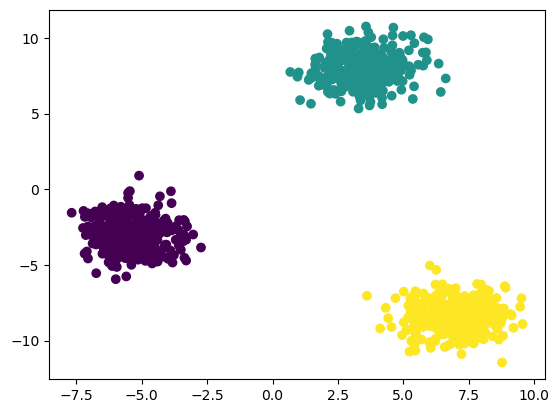

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
## standaradization.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [9]:
x_train_scaled=scaler.fit_transform(X_train)

In [10]:
X_test_scaled=scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

The **Elbow Method** is a popular technique used to determine the optimal number of clusters (**k**) in **K-Means clustering**. It helps identify the value of **k** where adding more clusters does not significantly improve the clustering performance.

### **How It Works:**
1. **Compute K-Means for different values of k** (e.g., k = 1 to 10).
2. **Calculate the Within-Cluster Sum of Squares (WCSS)** for each k.
   - WCSS measures the variance within each cluster.
   - It is computed as the sum of squared distances between each data point and its cluster centroid.
3. **Plot WCSS vs. k** to visualize the trend.
4. **Identify the "elbow point"** where WCSS stops decreasing significantly.
   - The elbow point represents the optimal k, as adding more clusters beyond this point results in diminishing returns.

### **Interpreting the Elbow Plot**
- **Before the elbow:** WCSS decreases rapidly as k increases.
- **At the elbow:** WCSS reduction slows down significantly.
- **Beyond the elbow:** Additional clusters do not provide substantial improvement.

### **Example**
If you plot WCSS vs. k and see a sharp bend (like an elbow) at **k=3**, it suggests that **3 clusters** are optimal for your data.

Would you like a Python example to implement the Elbow Method? 🚀

In [13]:
## Elbow Method 
wcss=[]
for k in range (1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [14]:
wcss

[1399.9999999999993,
 674.1903161193075,
 39.31715992326915,
 33.55331183562536,
 28.119289891660575,
 23.121948290958244,
 20.925039153927493,
 18.917214668606906,
 16.880781636449665,
 15.222662566481821]

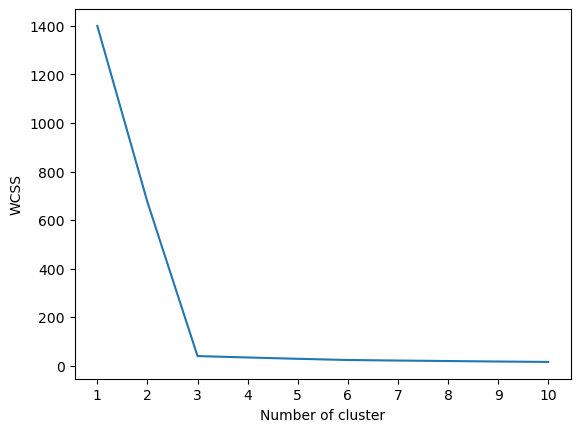

In [16]:
# plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [17]:
kmeans.fit_predict(x_train_scaled)

c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([2, 8, 6, 4, 3, 2, 9, 6, 0, 5, 7, 5, 7, 0, 2, 9, 4, 5, 6, 5, 5, 9,
       1, 5, 5, 6, 9, 8, 1, 9, 6, 0, 9, 9, 9, 8, 2, 1, 7, 0, 8, 3, 5, 6,
       5, 8, 8, 2, 2, 9, 6, 2, 9, 4, 5, 2, 8, 0, 0, 3, 6, 2, 3, 7, 5, 5,
       5, 1, 2, 5, 5, 9, 2, 4, 6, 4, 2, 9, 3, 3, 7, 8, 6, 2, 9, 0, 1, 1,
       1, 6, 2, 3, 9, 8, 9, 8, 8, 9, 5, 0, 7, 9, 8, 9, 7, 8, 2, 6, 6, 2,
       0, 5, 2, 8, 1, 2, 0, 9, 3, 6, 3, 9, 3, 7, 5, 6, 1, 4, 9, 2, 0, 2,
       8, 6, 9, 8, 8, 9, 9, 7, 2, 1, 9, 7, 2, 7, 6, 3, 5, 8, 0, 9, 6, 3,
       7, 1, 7, 6, 8, 9, 8, 6, 8, 6, 8, 3, 2, 4, 6, 4, 0, 5, 9, 6, 4, 1,
       6, 8, 2, 1, 7, 3, 6, 3, 6, 6, 1, 8, 5, 2, 5, 0, 2, 8, 2, 1, 1, 8,
       5, 9, 2, 7, 4, 3, 2, 4, 8, 0, 4, 9, 3, 6, 5, 4, 9, 4, 3, 9, 1, 7,
       5, 0, 5, 5, 7, 7, 8, 1, 1, 1, 5, 0, 1, 1, 5, 2, 0, 5, 6, 0, 6, 8,
       8, 5, 5, 9, 8, 1, 6, 3, 6, 5, 4, 7, 8, 8, 5, 5, 4, 9, 1, 3, 4, 0,
       7, 1, 4, 8, 0, 5, 2, 2, 1, 5, 6, 9, 1, 7, 4, 7, 6, 1, 3, 5, 6, 5,
       6, 9, 6, 5, 6, 0, 5, 1, 5, 3, 2, 1, 3, 7, 5,

In [18]:
y_pred=kmeans.predict(X_test_scaled)

In [19]:
y_pred

array([7, 9, 9, 1, 9, 6, 5, 6, 9, 2, 9, 8, 1, 8, 9, 5, 1, 9, 2, 5, 1, 0,
       4, 6, 8, 9, 6, 3, 5, 3, 1, 3, 8, 5, 4, 0, 1, 1, 9, 9, 7, 6, 3, 5,
       1, 9, 2, 2, 0, 2, 6, 9, 6, 1, 6, 6, 6, 9, 7, 5, 8, 7, 6, 9, 5, 6,
       8, 6, 6, 1, 2, 0, 2, 6, 3, 4, 3, 6, 0, 3, 9, 7, 0, 0, 0, 5, 6, 3,
       4, 1, 2, 5, 3, 3, 3, 6, 0, 1, 3, 5, 2, 7, 1, 4, 2, 2, 7, 7, 2, 2,
       5, 2, 8, 2, 1, 3, 2, 7, 9, 8, 7, 6, 4, 5, 3, 3, 3, 4, 3, 0, 9, 7,
       8, 3, 9, 9, 3, 6, 6, 9, 2, 1, 2, 7, 0, 3, 7, 8, 2, 8, 3, 3, 4, 1,
       7, 1, 8, 9, 8, 2, 3, 9, 8, 0, 7, 9, 2, 3, 4, 0, 1, 1, 5, 9, 9, 8,
       1, 5, 1, 7, 3, 2, 9, 9, 7, 7, 1, 3, 3, 9, 4, 1, 8, 8, 9, 9, 8, 3,
       8, 6, 2, 7, 4, 8, 1, 7, 8, 7, 1, 7, 4, 5, 8, 2, 5, 9, 6, 1, 6, 3,
       7, 5, 5, 5, 8, 9, 3, 4, 7, 1, 8, 7, 4, 2, 6, 5, 5, 2, 1, 8, 8, 0,
       9, 2, 3, 9, 9, 6, 1, 6, 7, 7, 4, 3, 7, 3, 2, 1, 5, 1, 5, 0, 1, 3,
       1, 6, 3, 1, 5, 3, 4, 5, 5, 3, 3, 6, 7, 7, 8, 5, 4, 3, 4, 1, 8, 9,
       9, 5, 3, 5, 9, 5, 7, 2, 0, 4, 1, 5, 7, 9])

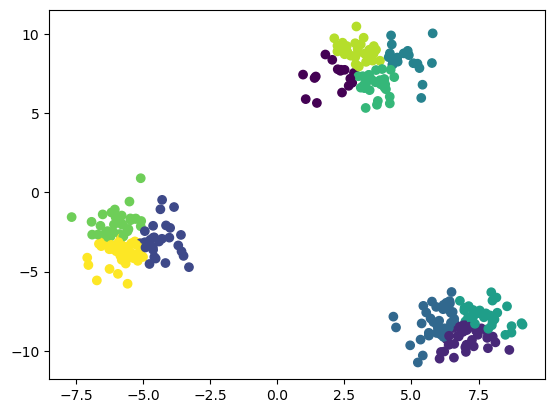

In [22]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

### **Validating the Optimal k Value in K-Means Clustering**  
Once you identify a potential **k** value using the **Elbow Method**, you should further validate it using other techniques like **KneeLocator** and **Silhouette Scoring**.  

---

## **1. KneeLocator Method**
The **KneeLocator** is an automated way to detect the elbow/knee point in the **Elbow Method** graph. Instead of visually inspecting the plot, the **KneeLocator** algorithm finds the optimal **k** mathematically.  

### **How it Works**  
- Computes the **Within-Cluster Sum of Squares (WCSS)** for different values of k.
- Identifies the point where the **rate of decrease** in WCSS slows down significantly (i.e., the "knee" point).
- The point returned is the optimal **k** value.  

### **Key Benefit**  
✅ Automates the process of selecting k instead of relying on manual visual inspection.

---

## **2. Silhouette Scoring**
The **Silhouette Score** evaluates the quality of clusters by measuring how similar each point is to its **own cluster** compared to other clusters.  

### **How it Works**  
- Computes the **silhouette coefficient** for each data point:  
  \[
  S = \frac{(b - a)}{\max(a, b)}
  \]  
  Where:  
  - \( a \) = Mean intra-cluster distance (distance between a point and others in the same cluster).  
  - \( b \) = Mean nearest-cluster distance (distance between a point and the nearest neighboring cluster).  
- The **silhouette score** ranges from **-1 to 1**:  
  - **+1** → Well-clustered points.  
  - **0** → Overlapping clusters.  
  - **-1** → Misclassified points.  
- The optimal **k** is the one with the **highest average silhouette score**.

### **Key Benefit**  
✅ Helps in evaluating cluster separation and cohesion, ensuring meaningful clusters.

---

## **Summary**  
| Method | Purpose | Best k Selection |
|--------|---------|----------------|
| **Elbow Method** | Finds the point where adding clusters has diminishing returns | **Elbow point on WCSS plot** |
| **KneeLocator** | Automates elbow detection | **Mathematically detected knee point** |
| **Silhouette Score** | Measures cluster quality | **Highest silhouette score** |

**Recommendation:**  
- Start with **Elbow Method** + **KneeLocator** to get a rough idea of **k**.  
- Validate with **Silhouette Score** for better cluster evaluation.  

Would you like help implementing this on your dataset? 🚀

In [ ]:
## Validating the k value.
## Kneelocator
## Silhoute scoring

In [23]:
## KneeLocator
!pip install kneed

In [24]:
from kneed import KneeLocator

In [25]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [26]:
kl.elbow

3

In [27]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    score=silhouette_score(x_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Aftab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [28]:
silhouette_coefficients

[0.6010939272304554,
 0.8725738326853887,
 0.7177704254875829,
 0.5379364134482864,
 0.3711986015514017,
 0.3694924453254901,
 0.3604946011200305,
 0.32882401227039104,
 0.33632851671772873]

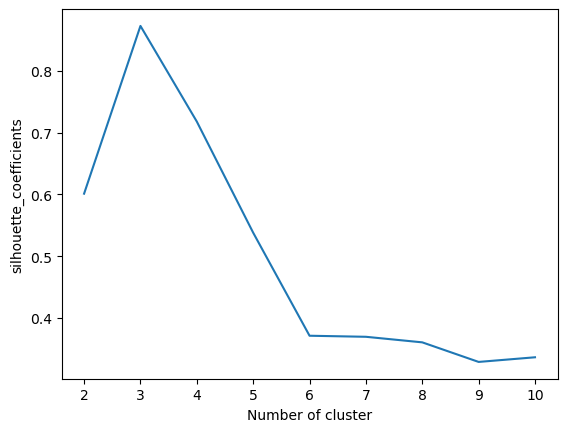

In [30]:
# plot elbow curve
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of cluster")
plt.ylabel("silhouette_coefficients")
plt.show()